In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from scipy.interpolate import make_interp_spline

x = np.array([a/10 for a in range(-7,8)])
#x_cut = [a/10 for a in range(5,23)]
y = np.array([0,1,942,942,942,943,943,943,943,942,942,942,941,2,0])
y=y/20
#y_cut = [55,134,219,300,384,471,549,634,705,789,867,947,1021,1110,1181,1270,1334,1415]
#y_cut_err = [1/2 for a in range(18)]
#y_err = [1/2 for a in range(23)]

#for a in range(5):
#    y_err[a]=0.01/2

print(x)
#print(x_cut)
print(y)
#print(y_err)

[-0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6
  0.7]
[ 0.    0.05 47.1  47.1  47.1  47.15 47.15 47.15 47.15 47.1  47.1  47.1
 47.05  0.1   0.  ]


In [2]:
p, cov=numpy.polyfit(x_cut, y_cut, 1, cov=True)
mymodel = numpy.poly1d(p)
myline = numpy.linspace(0.3, 2.3, 100)
a1 = mymodel.coefficients[0]
a0 = mymodel.coefficients[1]

r2=r2_score(y_cut, mymodel(x_cut))
print("R2=%.4f"%r2)
# print("the values are %d %7.5f %s" % (x, y, z))
print(mymodel.coefficients)

print(numpy.sqrt(numpy.diag(cov)))
sigma1,sigma0=numpy.sqrt(numpy.diag(cov))

NameError: name 'numpy' is not defined

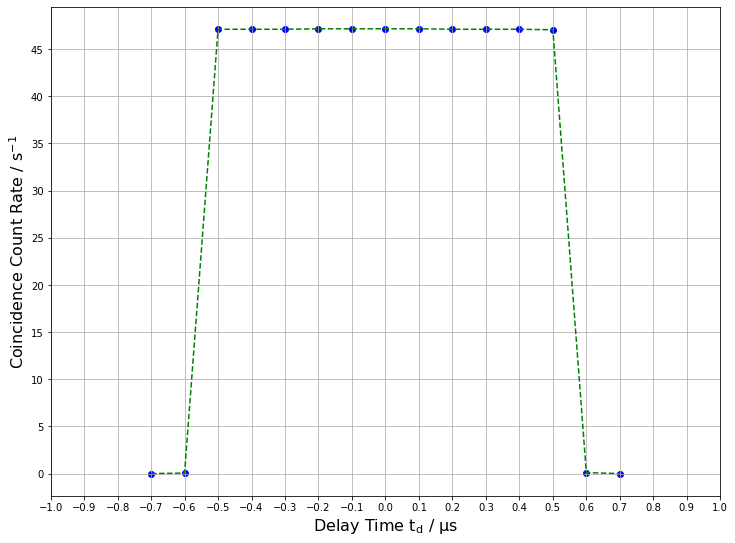

In [9]:
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = make_interp_spline(x, y)(x_smooth)


plt.figure(figsize=(12,9))
#plt.title(r"$\rm P_{LD} - I$ Distribution", fontsize=18)
#plt.errorbar(x, y, yerr=y_err,fmt='o', label='data', color='blue', markersize=5, ecolor='blue', capsize=3)
plt.xlabel(r'$\rm Delay\ Time\ t_d\ /\ \mu s$', fontsize=16, color="black") 
plt.ylabel(r'$\rm Coincidence\ Count\ Rate\ /\ s^{-1}$', fontsize=16, color="black") 
plt.scatter(x, y, color="blue", label='data')
plt.plot(x, y, color = 'green', linestyle='dashed')
plt.grid(True)
#plt.axis([30, 400, 100, 400])
#plt.figure()
#plt.legend(loc=0, frameon=False, fontsize=16)

ax=plt.gca()
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(100/20)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(-1,1)
#plt.ylim(-5,1000)

#plt.text(0.5, 1300,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
#plt.text(0.5, 1200, r"$a_1=%f\pm%f$"%(a1,sigma1), fontsize=16,color="green")
#plt.text(0.5, 1100, r"$a_0=%f\pm%f$"%(a0,sigma0), fontsize=16,color="green")
#plt.text(0.5, 1000, r"$R^2=%f$"%r2, fontsize=16, color="green")

plt.savefig('./phyex1_fig.pdf')
plt.show()